In [3]:
# %load ImportsDefinitions.py
#!/usr/bin/env python

# In[1]:


#Imports
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import re
import joblib 
import pickle
import numpy as np
from nltk.corpus import stopwords
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import time
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import svm
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree

from sklearn.svm import LinearSVC


import seaborn as sns

#accuracy_score(labels_test,pred)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
#accuracy_score(labels_test,pred)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies
from sklearn.model_selection import TimeSeriesSplit



from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('vader_lexicon')


# In[1]:


#Ορισμός συναρτήσεων για να ελέξγχουμε τον καλύτερο vectorizer
def tfidf_test_simple(X_train,X_test,y_train,y_test,token_izer):
    if (token_izer=='1'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor)
    elif (token_izer=='2'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor_imdb)
    else:
        tfvect= TfidfVectorizer()
    tfidf_train = tfvect.fit_transform(X_train)
    tfidf_test = tfvect.transform(X_test)
    nb=MultinomialNB()
    #train the model and timing it
    #kanoume prediction gia to x_test_dtm
    
    # cross val score/ predict
    cvec_score = cross_val_score(nb, tfidf_train, y_train, cv=4 )
    feature_names = tfvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("to accuracy tou TFIDF me NB einai {}".format(cvec_score.mean()))
    
    visualizer = FreqDistVisualizer(features=feature_names, orient='h')
    visualizer.fit(tfidf_train)
    visualizer.poof()
    
    return cvec_score.mean()

def countvect_test_simple(X_train,X_test,y_train,y_test,token_izer):
    if (token_izer=='1'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor)
    elif (token_izer=='2'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor_imdb)
    else:
        countvect= CountVectorizer()
    #CountVect
    countvect.fit(X_train)
    #to metatrepoume se dtm sparse matrix
    X_train_dtm=countvect.transform(X_train)
    X_test_dtm=countvect.transform(X_test)
    #Ftiaxnoume Multinomial Naive Bayes modelo
    nb=MultinomialNB()
    #kanoume prediction gia to x_test_dtm
    
    # cross val score/ predict
    cvec_score = cross_val_score(nb, X_train_dtm, y_train, cv=4 )
        
          
    feature_names = countvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("to accuracy tou CountVectorizer me NB einai: {}".format(cvec_score.mean()))
    
    visualizer = FreqDistVisualizer(features=feature_names, orient='h')
    visualizer.fit(X_train_dtm)
    visualizer.poof()
    
    return cvec_score.mean()


# In[9]:


#oρισμός συναρτήσεων για να ελέγχουμε το max_df
def countvect_test_maxdf(X_train,X_test,y_train,y_test,token_izer,maxdf):
    if (token_izer=='1'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor,max_df=maxdf)
    elif (token_izer=='2'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor_imdb,max_df=maxdf)
    else:
        countvect= CountVectorizer(max_df=maxdf)
    X_train_dtm = countvect.fit_transform(X_train)
    X_test_dtm = countvect.transform(X_test)
    nb=MultinomialNB()
    cvec_score = cross_val_score(nb, X_train_dtm, y_train, cv=4 )
   
    #kanoume evaluate ta apotelesmata mas me Logistic Regression
    feature_names = countvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("To accuracy NB me Max df: {} είναι : {} ".format(maxdf,cvec_score))
    return cvec_score.mean()


def tfidf_test_maxdf(X_train,X_test,y_train,y_test,token_izer,maxdf):
    if (token_izer=='1'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor,max_df=maxdf)
    elif (token_izer=='2'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor_imdb,max_df=maxdf)
    else:
        tfvect= TfidfVectorizer(max_df=maxdf)
    tfidf_train = tfvect.fit_transform(X_train)
    tfidf_test = tfvect.transform(X_test)
    nb=MultinomialNB()
    cvec_score = cross_val_score(nb, tfidf_train, y_train, cv=4 )
    
    #kanoume evaluate ta apotelesmata mas me Logistic Regression
    feature_names = tfvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("To accuracy NB me max df: {} είναι : {} ".format(maxdf,cvec_score))
    return cvec_score.mean()


# In[12]:


def countvect_test_ngrams(X_train,X_test,y_train,y_test,token_izer,ngrams):
    if (token_izer=='1'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor,ngram_range=(1,ngrams))
    elif (token_izer=='2'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor_imdb,ngram_range=(1,ngrams))
    else:
        countvect= CountVectorizer(ngram_range=(1,ngrams))
    X_train_dtm = countvect.fit_transform(X_train)
    X_test_dtm = countvect.transform(X_test)
    nb=MultinomialNB()
    cvec_score = cross_val_score(nb, X_train_dtm, y_train, cv=4 )
   
    #kanoume evaluate ta apotelesmata mas me Logistic Regression
    feature_names = countvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("To accuracy NB me {}-ngrams είναι : {} ".format(ngrams,cvec_score))
    return cvec_score.mean()

def tfidf_test_ngrams(X_train,X_test,y_train,y_test,token_izer,ngrams):
    if (token_izer=='1'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor,ngram_range=(1,ngrams))
    elif (token_izer=='2'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor_imdb,ngram_range=(1,ngrams))
    else:
        tfvect= TfidfVectorizer(ngram_range=(1,ngrams))
    tfidf_train = tfvect.fit_transform(X_train)
    tfidf_test = tfvect.transform(X_test)
    nb=MultinomialNB()
    cvec_score = cross_val_score(nb, tfidf_train, y_train, cv=4 )
    
    #kanoume evaluate ta apotelesmata mas me Logistic Regression
    feature_names = tfvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("To accuracy NB me {}-ngrams είναι : {} ".format(ngrams,cvec_score))
    return cvec_score.mean()


# In[ ]:


def countvect_test_maxfeat(X_train,X_test,y_train,y_test,token_izer,maxfeat):  
    if (token_izer=='1'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor,max_features=maxfeat)
    elif (token_izer=='2'):
        countvect= CountVectorizer(tokenizer=tokenizer_preproccessor_imdb,max_features=maxfeat)
    else:
        countvect= CountVectorizer(max_features=maxfeat)
    X_train_dtm = countvect.fit_transform(X_train)
    X_test_dtm = countvect.transform(X_test)
    nb=MultinomialNB()
    cvec_score = cross_val_score(nb, X_train_dtm, y_train, cv=4 )
   
    #kanoume evaluate ta apotelesmata mas me Logistic Regression
    feature_names = countvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("To accuracy NB me max features {} είναι : {} ".format(maxfeat,cvec_score))
    return cvec_score.mean()

def tfidf_test_maxfeat(X_train,X_test,y_train,y_test,token_izer,maxfeat):
    if (token_izer=='1'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor,max_features=maxfeat)
    elif (token_izer=='2'):
        tfvect= TfidfVectorizer(tokenizer=tokenizer_preproccessor_imdb,max_features=maxfeat)
    else:
        tfvect= TfidfVectorizer(max_features=maxfeat)
    tfidf_train = tfvect.fit_transform(X_train)
    tfidf_test = tfvect.transform(X_test)
    nb=MultinomialNB()
    cvec_score = cross_val_score(nb, tfidf_train, y_train, cv=4 )
    
    #kanoume evaluate ta apotelesmata mas me Logistic Regression
    feature_names = tfvect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("To accuracy NB me max featurues : {} είναι : {} ".format(maxfeat,cvec_score))
    return cvec_score.mean()


# In[4]:


def tokenizer_preproccessor(text):
    stop = set(stopwords.words('english'))
    #kanoume preprocessing ta dedomena mas
    word_tokens=word_tokenize(text.lower()) #kanoume tokenize
    #print("Έχουμε " + str(len(word_tokens))+ " tokens")
    #filtered_word_tokens = [word for word in word_tokens if word not in stop] #svinoume ta stopwords
    #print("Αφού αφαιρέσαμε τα stopwords, έχουμε τελικά " + str(len(filtered_word_tokens)) + " tokens")
    #print(filtered_word_tokens)
    filtered_word_tokens = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in word_tokens]  #svinoume ta punctuations
    #filtered_word_tokens = [x for x in filtered_word_tokens if x not in ['film','movie']]  #svinoume ta punctuations    
    filtered_word_tokens = [word for word in filtered_word_tokens if len(word)>1] #svinoume tis mikres lekseis
    #print("Αφού αφαιρέσαμε τα σημεία στίξης και τις μικρές λέξεις, έχουμε τελικά " + str(len(filtered_word_tokens)) + " tokens")
    #print(filtered_word_tokens)
    tagged_filtered_tokens=nltk.pos_tag(filtered_word_tokens) #kanoume pos tag tis lekseis gia syntaktiki analysi
    #print(tagged_filtered_tokens)
            #ftiaxnoume ta pos tags wste na mpoun san input sto sentisynset
    #epeidh ta dedomena tou postag ginontai tuples, ta metatrepoume se lista
    newtags=[] #lista me ta nea tags kai idio counter me ta tagged words
    for tag in tagged_filtered_tokens:
        if tag[1] in set(['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']):
            newtags.append('v')
        elif tag[1] in set(['JJ', 'JJR', 'JJS']):
             newtags.append('a')
        elif tag[1] in set(['RB', 'RBR', 'RBS']):
             newtags.append('r')
        elif tag[1] in set(['NNS', 'NN', 'NNP', 'NNPS']):
             newtags.append('n')
        else:
             newtags.append('a')
    
    lem_words=[] #edw tha mpoun oi lematized lekseis pou exoume kratisei apo to preprocessing
    counter=0 #vazoume ton counter gia na kanoume iterate ta stoixeia tis listas twn tags
    for word in tagged_filtered_tokens:    
        lem_words.append(wnl.lemmatize(word[0],newtags[counter]))
        counter+=1
    lem_words = [word for word in lem_words if word not in stop] #svinoume ta stopwords
    return lem_words

def tokenizer_preproccessor_imdb(text):
    stop = nltk.corpus.stopwords.words('english')
    stop.append('film')
    stop.append('movie')
    stop.append('br')
    #kanoume preprocessing ta dedomena mas
    word_tokens=word_tokenize(text.lower()) #kanoume tokenize
    #print(word_tokens)
    #print("Έχουμε " + str(len(word_tokens))+ " tokens")
    #filtered_word_tokens = [word for word in word_tokens if word not in stop] #svinoume ta stopwords
    #print("Αφού αφαιρέσαμε τα stopwords, έχουμε τελικά " + str(len(filtered_word_tokens)) + " tokens")
    #print(filtered_word_tokens)
    filtered_word_tokens = [re.sub(r'[^A-Za-z]+', '', x) for x in word_tokens]  #svinoume ta punctuations
    filtered_word_tokens = [x for x in filtered_word_tokens if ((x.startswith("'")==0 or x.startswith('-') or x.startswith('.')))]  #svinoume ta punctuations

    #filtered_word_tokens = [x for x in filtered_word_tokens if x not in ['film','movie']]  #svinoume ta punctuations    
    filtered_word_tokens = [word for word in filtered_word_tokens if len(word)>1] #svinoume tis mikres lekseis
    #print(filtered_word_tokens)
    #print("Αφού αφαιρέσαμε τα σημεία στίξης και τις μικρές λέξεις, έχουμε τελικά " + str(len(filtered_word_tokens)) + " tokens")
    #print(filtered_word_tokens)
   
    tagged_filtered_tokens=nltk.pos_tag(filtered_word_tokens) #kanoume pos tag tis lekseis gia syntaktiki analysi
    #print(tagged_filtered_tokens)
            #ftiaxnoume ta pos tags wste na mpoun san input sto sentisynset
    #epeidh ta dedomena tou postag ginontai tuples, ta metatrepoume se lista
    newtags=[] #lista me ta nea tags kai idio counter me ta tagged words
    for tag in tagged_filtered_tokens:
        if tag[1] in set(['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']):
            newtags.append('v')
        elif tag[1] in set(['JJ', 'JJR', 'JJS']):
             newtags.append('a')
        elif tag[1] in set(['RB', 'RBR', 'RBS']):
             newtags.append('r')
        elif tag[1] in set(['NNS', 'NN', 'NNP', 'NNPS']):
             newtags.append('n')
        else:
             newtags.append('a')
    
    lem_words=[] #edw tha mpoun oi lematized lekseis pou exoume kratisei apo to preprocessing
    counter=0 #vazoume ton counter gia na kanoume iterate ta stoixeia tis listas twn tags
    for word in tagged_filtered_tokens:    
        lem_words.append(wnl.lemmatize(word[0],newtags[counter]))
        counter+=1
    lem_words = [word for word in lem_words if word not in stop] #svinoume ta stopwords
    #print(lem_words)
    
    return lem_words


# In[5]:


def SentimentAnalysis_Sentiwordnet(text_samples):
    my_sentiments=[] #h lista pou tha periexei tosynaisthitiko score kathe keimenou
    my_sentiments_class=[]
    #print(stopwords)
    stop = set(stopwords.words('english'))
    for text in text_samples:
        #kanoume preprocessing ta dedomena mas
        word_tokens=word_tokenize(text.lower()) #kanoume tokenize
        #print("Έχουμε " + str(len(word_tokens))+ " tokens")
        filtered_word_tokens = [word for word in word_tokens if word not in stop] #svinoume ta stopwords
        #print("Αφού αφαιρέσαμε τα stopwords, έχουμε τελικά " + str(len(filtered_word_tokens)) + " tokens")
        #print(filtered_word_tokens)
        filtered_word_tokens = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in filtered_word_tokens]  #svinoume ta punctuations
        filtered_word_tokens = [word for word in filtered_word_tokens if len(word)>1] #svinoume tis mikres lekseis
        #print("Αφού αφαιρέσαμε τα σημεία στίξης και τις μικρές λέξεις, έχουμε τελικά " + str(len(filtered_word_tokens)) + " tokens")
        #print(filtered_word_tokens)
        tagged_filtered_tokens=nltk.pos_tag(filtered_word_tokens) #kanoume pos tag tis lekseis gia syntaktiki analysi
        #print(tagged_filtered_tokens)
                #ftiaxnoume ta pos tags wste na mpoun san input sto sentisynset
        #epeidh ta dedomena tou postag ginontai tuples, ta metatrepoume se lista
        newtags=[] #lista me ta nea tags kai idio counter me ta tagged words
        for tag in tagged_filtered_tokens:
            if tag[1] in set(['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']):
                newtags.append('v')
            elif tag[1] in set(['JJ', 'JJR', 'JJS']):
                 newtags.append('a')
            elif tag[1] in set(['RB', 'RBR', 'RBS']):
                 newtags.append('r')
            elif tag[1] in set(['NNS', 'NN', 'NNP', 'NNPS']):
                 newtags.append('n')
            else:
                 newtags.append('a')
                    
                    

        lem_words=[] #edw tha mpoun oi lematized lekseis pou exoume kratisei apo to preprocessing
        counter=0 #vazoume ton counter gia na kanoume iterate ta stoixeia tis listas twn tags
        for word in tagged_filtered_tokens:    
            lem_words.append(wnl.lemmatize(word[0],newtags[counter]))
            counter+=1
           # print (newtags)
       # new_words_tags_dict = {'word':'synscore'}
        #print(newtags,lem_words)
            #print(lem_words)
        #ypologizoume to synaisthima kathe leksis , mazi me to POSTAG tis
        posscore=0
        negscore=0
        for i in range(len(lem_words)): 
            synsets = swn.senti_synsets(lem_words[i],newtags[i])
            for synst in synsets: #athroizoume ta thetika kai ta arnhtika score kathe leksis
                posscore=posscore+synst.pos_score()
                negscore=negscore+synst.neg_score()     
        my_sentiments.append(posscore-negscore)
        #print(my_sentiments)
        if (posscore-negscore)>=0:
            my_sentiments_class.append(1)
        else:
            my_sentiments_class.append(0)
    print(len(my_sentiments))
    return(my_sentiments_class)


# In[6]:


def SentimentAnalysis_Vader(text_samples):
    analyzer = SentimentIntensityAnalyzer()
    vader_sentiments=[]
    vader_class_sentiments=[]
    for text in text_samples:
        sum=0
        #Kovoume kathe keimeno se protaseis wste na vgalei sentiment polarity o vader, ta opoia athroizoume
        sentences=text.split('\n')   
        for sentence in sentences:
            sent = analyzer.polarity_scores(sentence)
            #print("{:-<65} {}".format(sentence, vs))
            sum=sum+sent['compound']
        average=sum/len(sentences)
        vader_sentiments.append(average)
        if (average>=0):
            vader_class_sentiments.append(1)       
        else:
            vader_class_sentiments.append(0)
        #print(sentiments)
        #print(average)
    #Data Examination for Unnotated Dataset
    print("Έχουμε " + str(vader_class_sentiments.count(1)) + " χαρούμενα τραγούδια")
    print("Έχουμε " + str(vader_class_sentiments.count(0)) + " στενάχωρα τραγούδια")
    return vader_class_sentiments


# In[ ]:


def classifier_finder(X_train,X_test,y_train,y_test):
    classifiers=[]

    scores=[]
    model1=LogisticRegression(max_iter=1000)
    classifiers.append(model1)
    model2=MultinomialNB()
    classifiers.append(model2)
    model4 = tree.DecisionTreeClassifier()
    classifiers.append(model4)
    model5 = RandomForestClassifier()
    classifiers.append(model5)
    model6=LinearSVC(max_iter=2000)
    classifiers.append(model6)
    
    
    for clf in classifiers:
        clf.fit(X_train, y_train)
        
        cvec_score = cross_val_score(clf, X_train, y_train, cv=10 )
        
        
        print("Η επιτυχία του  %s είναι:  %s"%(clf, cvec_score.mean()))
        scores.append(cvec_score.mean())
# DataFrame Accuracy 
    scores_df = pd.DataFrame()
    scores_df['params']= ['Logistisc Regression','Multinomial Naive Bayes','Decision Tree','Random Forest','Linear SVC']
    scores_df['scores']= scores
    print(scores_df)


# In[ ]:


def classifier_finder_music(X_train,y_train):
    classifiers=[]
    #COUNT VECTORIZER

    model1=LogisticRegression()
    classifiers.append(model1)
    model2 = tree.DecisionTreeClassifier()
    classifiers.append(model2)
    model3 = RandomForestClassifier()
    classifiers.append(model3)
    model4=LinearSVC()
    classifiers.append(model4)
    model5 = KNeighborsClassifier()
    classifiers.append(model5)


    scorelist=[]

    for clf in classifiers:
        clf.fit(X_train, y_train)
        cvec_score = cross_val_score(clf, X_train, y_train, cv=10)
        print("Τα αποτελέσματα του Cross-Validation για τον {} είναι:  {} ".format(clf,cvec_score.mean()))                                      
        scorelist.append(cvec_score.mean())
# DataFrame Accuracy 
    scores_df = pd.DataFrame()
    scores_df['params']= ['Logistisc Regression','Decision Tree','Random Forest','Linear SVC','K-nn',]
    scores_df['scores']= scorelist
    print(scores_df)
    


# In[1]:


#δημιουργούμε συναρτήσεις για να αποθηκεύουμε και να φορτώνουμε  τις λίστες που θα φτιάξουμε με την ανάλυση του vader 
#και του sentiwordnet
def saveList(myList,filename):
    np.save(filename,myList)
    print("Saved successfully!")
    
def loadList(filename):
    tempNumpyArray=np.load(filename,allow_pickle=True)
    return tempNumpyArray.tolist()





[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading sentiwordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [4]:
#φορτώνουμε τα σετ δεδομένων
path1='design_matrix.csv'
path2='mean_emotion_ratings.csv'
data_input= pd.read_csv(path1)
data_class= pd.read_csv(path2)


In [5]:
data_input.head(5) #vlepoume oti prepei na allaksoume to mode, kathws periexei kathgoriaka dedomena, kai na diagrapsoume to Number

,Nro,Register,Mode,Tempo,Soundlevel,Articulation,Timbre,Melody
0,1,4,1,4,4,2,2,4
1,2,5,1,4,1,1,2,2
2,3,2,2,5,1,1,2,1
3,4,1,1,5,4,4,1,2
4,5,3,2,1,3,2,2,1


In [6]:
data_class.head(5) # vlepoume oti prepei na diagrapsoume to number kai na doume pws tha xeiristoume ta multiclass data afou theloume diadikh synaisthimatikh analysh

,Nro,Scary,Happy,Sad,Peaceful
0,1,1.2889,4.4667,1.7111,3.1333
1,2,1.0667,5.4444,1.4889,4.4889
2,3,2.0222,1.4889,3.7778,2.7111
3,4,2.2889,4.1111,1.2667,1.4889
4,5,1.4000,1.4667,5.0444,3.8444


In [7]:
#θα μετατρέψουμε το Mode από τα δεδομένα μας, σε δυο διαφορετικά διανύσματα εισόδου, το Major και το Minor.Αν η κλιμακα ειναι
#ματζορε τοτε το Major θα παιρνει τιμή 1, και το Minor τιμη 0. αντιθετα, αν η συγχορδία ειναι μινορε, το Major θα παιρνει την 
#τιμη 0 και το Minor την τιμή 1
#ταυτοχρονα διαγραφουμε τις στηλες Nro από τα δεδομένα εισόδου και εξόδου μας, καθώς και το Mode από τα δεδομένα εισόδου μας
Major=[]
Minor=[]
#αρχικα δημιουργουμε τις αντιστοιχες λιστες
for i in range (0,len(data_input)):
    if (data_input['Mode'][i]==2):
        Major.append(1)
        Minor.append(0)
    else:
        Major.append(0)
        Minor.append(1)
#και μετα τις περναμε στο dataframe μας
data_input['Major']=Major
data_input['Minor']=Minor
if {'Nro'}.issubset(data_input.columns):
    data_input=data_input.drop(['Nro'], axis=1)
if {'Mode'}.issubset(data_input.columns):
    data_input=data_input.drop(['Mode'], axis=1)


In [8]:
data_input.head(5)


,Register,Tempo,Soundlevel,Articulation,Timbre,Melody,Major,Minor
0,4,4,4,2,2,4,0,1
1,5,4,1,1,2,2,0,1
2,2,5,1,1,2,1,1,0
3,1,5,4,4,1,2,0,1
4,3,1,3,2,2,1,1,0


In [9]:
#classes examination

count=0
for i in range (0,len(data_class)):
    if ((data_class['Happy'][i]>data_class['Sad'][i]) and (data_class['Peaceful'][i]<data_class['Scary'][i])):
        count=count+1
print("Έχουμε " + str(count) + " περιπτώσεις όπου happy>sad και peaceful < scary")#Παρατηρούμε ότι στο dataset εχουμε περιπτωσεις οπου η κλαση happy kai peaceful den symvadizoun san dyadika antitheta panta.
print("Συνεπώς υπάρχει αμφισημία μεταξύ των κλάσεων από το dataset μας.")
#synepws tha ftiaksoume 3 diaforetika classiciation gia ta dedomena pou exoume
print("Θα δημιουργήσουμε 3 διαφορετικές περιπτώσεις με βάση τις υπάρχουσες κλάσεις, ώστε να καλύψουμε τις διαφορετικές εκδοχές")

Έχουμε 22 περιπτώσεις όπου happy>sad και peaceful < scary
Συνεπώς υπάρχει αμφισημία μεταξύ των κλάσεων από το dataset μας.
Θα δημιουργήσουμε 3 διαφορετικές περιπτώσεις με βάση τις υπάρχουσες κλάσεις, ώστε να καλύψουμε τις διαφορετικές εκδοχές


Η απλή κλάση συναισθήματος που φτιάξαμε περιλαμβάνει: 
Έχουμε 86 χαρούμενα τραγούδια
Έχουμε 114 στενάχωρα τραγούδια


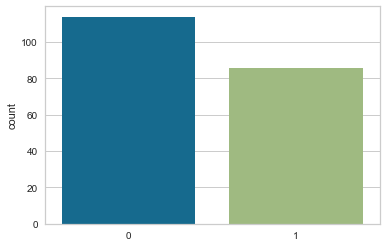

In [10]:

#θα δημιουργήσουμε διαφορετικές κλάσεις ώστε να καλύψουμε όλο το φάσμα των περιπτώσεων, δημιουργώντας 3 περιπτώσεις:
#Μία πιο απλή, (happy vs sad)
#μια πιο εξειδικευμένη (happy+peaceful vs peaceful+scary)
#και η πιο εξειδικευμένη θα ακολουθεί την εξής λογική
#αν happy>sad και peaceful >scary ->happy
#aν sad>happy και scary>peaceful -> sad
#αν happy>sad scary>peaceful τότε αν |happy - sad | *150%> |scary - peaceful| *50%-> happy, else sad

#τροποποιούμε το dataset των κλάσεων έτσι ώστε να έχουμε 2 κλάσεις, 1 για χαρούμενο 
#και 0 για στενάχωρο τραγούδι, αντίθετα με τις 4 κλάσεις που έχουμε ήδη φτιάξει
music_class_simple=[]

for i in range (0,len(data_class)):
    if (data_class['Happy'][i]>data_class['Sad'])[i]:
        music_class_simple.append(1)
    else:
        music_class_simple.append(0)
print("Η απλή κλάση συναισθήματος που φτιάξαμε περιλαμβάνει: ")
#print(music_class_simple)
#τώρα στο music_class_simple εχουμε τις κλάσεις των συναισθημάτων μας

print("Έχουμε " + str(music_class_simple.count(1)) + " χαρούμενα τραγούδια")
print("Έχουμε " + str(music_class_simple.count(0)) + " στενάχωρα τραγούδια")
sns.countplot(music_class_simple,label="Count")
plt.show()


Η δεύτερη κλάση συναισθήματος που φτιάξαμε περιλαμβάνει: 
Έχουμε 92 χαρούμενα τραγούδια
Έχουμε 108 στενάχωρα τραγούδια


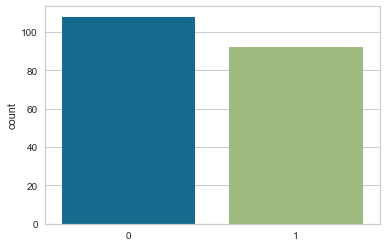

In [11]:
music_class_better=[]
#print(data_class)
for i in range (0,len(data_class)):
    if ((data_class['Happy'][i] + data_class['Peaceful'][i]) > (data_class['Sad'] + data_class['Scary'][i])[i]):
        music_class_better.append(1)
    else:
        music_class_better.append(0)
print("Η δεύτερη κλάση συναισθήματος που φτιάξαμε περιλαμβάνει: ")
#print(music_class_better)

print("Έχουμε " + str(music_class_better.count(1)) + " χαρούμενα τραγούδια")
print("Έχουμε " + str(music_class_better.count(0)) + " στενάχωρα τραγούδια")
sns.countplot(music_class_better,label="Count")
plt.show()


Η κλάση συναισθήματος που φτιάξαμε περιλαμβάνει: 
Έχουμε 102 χαρούμενα τραγούδια
Έχουμε 98 στενάχωρα τραγούδια


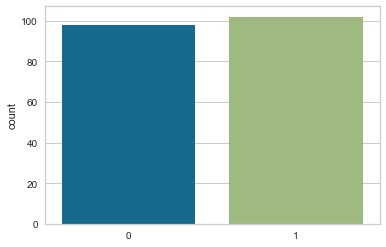

In [12]:
music_class_best=[]
for i in range (0,len(data_class)):
    if (((data_class['Happy'][i]) >= (data_class['Sad'][i])) and ((data_class['Peaceful'][i]) >= (data_class['Scary'][i]))):
            music_class_best.append(1)
    elif (((data_class['Happy'][i]) < (data_class['Sad'][i])) and ((data_class['Peaceful'][i]) < (data_class['Scary'][i]))):
            music_class_best.append(0)
    elif (((data_class['Happy'][i]) >= (data_class['Sad'][i])) and ((data_class['Peaceful'][i]) < (data_class['Scary'][i]))):
        if (1,5*((data_class['Happy'][i]) - (data_class['Sad'][i])) >= (0.5*(data_class['Scary'][i]) - (data_class['Peaceful'][i]))):
            music_class_best.append(1)
        elif (1,5*(data_class['Happy'][i]) - (data_class['Sad'][i]) < 0.5*((data_class['Scary'][i]) - (data_class['Peaceful'][i]))):
            music_class_best.append(0)
    elif (((data_class['Happy'][i]) < (data_class['Sad'][i])) and ((data_class['Peaceful'][i]) >= (data_class['Scary'][i]))):
        if ((data_class['Sad'][i]) - (data_class['Happy'][i]) >= ((data_class['Peaceful'][i]) - (data_class['Scary'][i]))):
            music_class_best.append(0)
        elif ((data_class['Sad'][i]) - (data_class['Happy'][i]) < ((data_class['Peaceful'][i]) - (data_class['Scary'][i]))):
            music_class_best.append(1)


print("Η κλάση συναισθήματος που φτιάξαμε περιλαμβάνει: ")
#print(music_class_best)
print("Έχουμε " + str(music_class_best.count(1)) + " χαρούμενα τραγούδια")
print("Έχουμε " + str(music_class_best.count(0)) + " στενάχωρα τραγούδια")
sns.countplot(music_class_best,label="Count")
plt.show()

In [13]:
#χωρίζουμε την πρώτη κλάση σε train/test σετ. τα ονομάζουμε X_train_s από το simple καθώς είναι προιόν της πιο απλής ανάλυσης

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(data_input, music_class_simple, test_size=0.2,random_state=5)
#κανονικοποιούμε τα δεδομένα εκπαίδευσης και ελέγχου, για να πετύχουμε καλύτερα αποτελέσματα
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()

X_train_scaled1 = scaler1.fit_transform(X_train_s)
X_test_scaled1 = scaler1.transform(X_test_s)
#print(X_scaled)

classifier_finder_music(X_train_scaled1,y_train_s)


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver t

Τα αποτελέσματα του Cross-Validation για τον LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) είναι:  0.8935539215686275 
Τα αποτελέσματα του Cross-Validation για τον DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') είναι:  0.8255882352941176 
Τα αποτελέσματα του Cross-Validation για τον RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impuri

In [14]:
#δημιουργούμε τα διανύσματα εκπαίδευσης και ελέγχου από τη δεύτερη ανάλυση. τα ονομάζουμε με κατάληξη _b από το better
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(data_input, music_class_better, test_size=0.2,random_state=6)

#κανονικοποιούμε τα διανύσματα μας
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train_b)
X_test_scaled2 = scaler2.transform(X_test_b)
#print(X_scaled)

classifier_finder_music(X_train_scaled2,y_train_b)



Τα αποτελέσματα του Cross-Validation για τον LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) είναι:  0.8396078431372549 
Τα αποτελέσματα του Cross-Validation για τον DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') είναι:  0.7899264705882354 


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Τα αποτελέσματα του Cross-Validation για τον RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) είναι:  0.8204411764705883 
Τα αποτελέσματα του Cross-Validation για τον LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) είναι:  0.8396078431372549 
Τα αποτελέσματα του Cross-Validation για τον KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') είν

In [15]:
#χωρίζουμε το 3ο υποσετ σε διανύσματα εκπαίδευσης και ελέγχου.η κατάληξη _B Προκύπτει από το Best καθώς είναι η πιο συγκεκριμένη μας ανάλυση για τις συναισθηματικές κλάσεις

X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(data_input, music_class_best, test_size=0.2,random_state=7)

scaler3 = StandardScaler()
X_train_scaled3 = scaler3.fit_transform(X_train_B)
X_test_scaled3 = scaler3.transform(X_test_B)
#print(X_scaled)

classifier_finder_music(X_train_scaled3,y_train_B)

C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Τα αποτελέσματα του Cross-Validation για τον LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) είναι:  0.8325490196078432 
Τα αποτελέσματα του Cross-Validation για τον DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') είναι:  0.8125490196078433 
Τα αποτελέσματα του Cross-Validation για τον RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impuri

In [16]:
#θελουμε να κανουμε optimize : 

#L-SVC, L-SVC,RF

In [17]:
#Θα κάνουμε GridSearch για τον LinearSVC για την πρώτη περίπτωση
#οριζουμε τις μεγιστες επαναληψεις
max_iter=[110,200,500,1000,1500,2000]
dual=[True,False]
#οριζουμε το πεναλτυ
C = [0.1,0.5,1.0,1.5,2.0,2.5,5,10]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

lSVC=LinearSVC()
grid = GridSearchCV(estimator=lSVC, param_grid=param_grid, cv = 10, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X_train_scaled1, y_train_s)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')
best_clf1 = LinearSVC(**grid_result.best_params_)
best_clf1.fit(X_train_scaled1,y_train_s)

Best: 0.900000 using {'C': 0.5, 'dual': True, 'max_iter': 110}
Execution time: 5.372822999954224 ms


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=110,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [18]:
#Θα κάνουμε GridSearch για τον LinearSVC για την δεύτερη περίπτωση
#οριζουμε τις μεγιστες επαναληψειςmax_iter=[110,200,500,1000,1500,2000]
dual=[True,False]
C = [0.1,0.5,1.0,1.5,2.0,2.5,5,10]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

lSVC=LinearSVC()
grid = GridSearchCV(estimator=lSVC, param_grid=param_grid, cv = 10, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X_train_scaled2, y_train_b)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')
best_clf2 = LinearSVC(**grid_result.best_params_)
best_clf2.fit(X_train_scaled2,y_train_b)

Best: 0.843750 using {'C': 5, 'dual': True, 'max_iter': 200}
Execution time: 1.9743807315826416 ms


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=200,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [19]:
#Θα κάνουμε GridSearch για τον RandomForestClassifier για την τρίτη περίπτωση
#οριζουμε τις μεγιστες επαναληψεις
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10,verbose=1)
start_time = time.time()
CV_rfc.fit(X_train_scaled3, y_train_B)

# Summarize results
print("Best: %f using %s" % (CV_rfc.best_score_, CV_rfc.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')
best_clf3 = RandomForestClassifier(**CV_rfc.best_params_)
best_clf3.fit(X_train_scaled3, y_train_B)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  5.6min finished
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.868750 using {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
Execution time: 337.2352831363678 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
#ελέγχουμε τους classifiers μας. Επειδή έχουμε εκπαιδεύσει και τους 3 στο ίδιο training data με διαφορετικά labels,
#θα δημιουργήσουμε 3 ελέγχους ,με 3 σκορ τα οποία θα πολλαπλασιάσουμε μεταξύ τους για να βρούμε το καλύτερο
#παίρνουμε σαν σωστή κλάση την 1η
# make a prediction
ypred1 = best_clf1.predict(X_test_scaled1)
ypred2 = best_clf1.predict(X_test_scaled2)
ypred3 = best_clf1.predict(X_test_scaled3)
#αποθηκευουμε τα σκορ
score1 = accuracy_score(y_test_s, ypred1)
score2 =accuracy_score(y_test_b, ypred2)
score3 = accuracy_score(y_test_B, ypred3)
print("Επιτυχία πρώτου ταξινομητη, LinearSVC :")
print("Η επιτυχία του ταξινομητή για το πρώτο σετ δεδομένων είναι {}".format(accuracy_score(y_test_s, ypred1)))
print("Η επιτυχία του ταξινομητή για το δεύτερο σετ δεδομένων είναι {}".format(accuracy_score(y_test_b, ypred2)))
print("Η επιτυχία του ταξινομητή για το τρίτο σετ δεδομένων είναι {}".format(accuracy_score(y_test_B, ypred3)))
print()
print("Βρίσκουμε τον μέσο όρο του ταξινομητή για τα διαφορετικά σετ δεδομένων")
print("Μέσος Όρος πρώτου ταξινομητή: {}".format((score1+score2+score3)/3))
print()
# Φτιάχνουμε DF με τα αποτελέσματα μας 
accuracy_df1 = pd.DataFrame()
accuracy_df1['Σετ']= ['1ο σετ δεδομένων','2ο σετ δεδομένων','3ο σετ δεδομένων',]
accuracy_df1['scores']= [score1,score2,score3]

#ελέγχουμε τους classifiers μας. Επειδή έχουμε εκπαιδεύσει και τους 3 στο ίδιο training data με διαφορετικά labels,
#θα δημιουργήσουμε 3 ελέγχους ,με 3 σκορ τα οποία θα πολλαπλασιάσουμε μεταξύ τους για να βρούμε το καλύτερο
#παίρνουμε σαν σωστή κλάση την 2η
# make a prediction
ypred1 = best_clf2.predict(X_test_scaled1)
ypred2 = best_clf2.predict(X_test_scaled2)
ypred3 = best_clf2.predict(X_test_scaled3)
#αποθηκευουμε τα σκορ
score1 = accuracy_score(y_test_s, ypred1)
score2 =accuracy_score(y_test_b, ypred2)
score3 = accuracy_score(y_test_B, ypred3)
print("Επιτυχία δεύτερου ταξινομητη, LinearSVC :")
print("Η επιτυχία του ταξινομητή για το πρώτο σετ δεδομένων είναι {}".format(accuracy_score(y_test_s, ypred1)))
print("Η επιτυχία του ταξινομητή για το δεύτερο σετ δεδομένων είναι {}".format(accuracy_score(y_test_b, ypred2)))
print("Η επιτυχία του ταξινομητή για το τρίτο σετ δεδομένων είναι {}".format(accuracy_score(y_test_B, ypred3)))
print()
print("Βρίσκουμε τον μέσο όρο του ταξινομητή για τα διαφορετικά σετ δεδομένων")
print("Mέσος Όρος δεύτερου ταξινομητή: {}".format((score1+score2+score3)/3))
print()
# Φτιάχνουμε DF με τα αποτελέσματα μας 
accuracy_df2 = pd.DataFrame()
accuracy_df2['Σετ']= ['1ο σετ δεδομένων','2ο σετ δεδομένων','3ο σετ δεδομένων',]
accuracy_df2['scores']= [score1,score2,score3]

#ελέγχουμε τους classifiers μας. Επειδή έχουμε εκπαιδεύσει και τους 3 στο ίδιο training data με διαφορετικά labels,
#θα δημιουργήσουμε 3 ελέγχους ,με 3 σκορ τα οποία θα πολλαπλασιάσουμε μεταξύ τους για να βρούμε το καλύτερο
#παίρνουμε σαν σωστή κλάση την 3η
# make a prediction
ypred1 = best_clf3.predict(X_test_scaled1)
ypred2 = best_clf3.predict(X_test_scaled2)
ypred3 = best_clf3.predict(X_test_scaled3)
#αποθηκευουμε τα σκορ
score1 = accuracy_score(y_test_s, ypred1)
score2 =accuracy_score(y_test_b, ypred2)
score3 = accuracy_score(y_test_B, ypred3)
print("Σκορ 3ου ταξινομητη, RandomForest :")
print("Η επιτυχία του ταξινομητή στο πρώτο σετ δεδομένων είναι {}".format(accuracy_score(y_test_s, ypred1)))
print("Η επιτυχία του ταξινομητή στο δεύτερο σετ δεδομένων είναι {}".format(accuracy_score(y_test_b, ypred2)))
print("Η επιτυχία του ταξινομητή στο τρίτο σετ δεδομένων είναι {}".format(accuracy_score(y_test_B, ypred3)))
print()
print("Βρίσκουμε τον μέσο όρο του ταξινομητή για τα διαφορετικά σετ δεδομένων")
print("Μέσος όρος τρίτου ταξινομητή: {}".format((score1+score2+score3)/3))
print()
# Φτιάχνουμε DF με τα αποτελέσματα μας 
accuracy_df3 = pd.DataFrame()
accuracy_df3['Σετ']= ['1ο σετ δεδομένων','2ο σετ δεδομένων','3ο σετ δεδομένων',]
accuracy_df3['scores']= [score1,score2,score3]


Επιτυχία πρώτου ταξινομητη, LinearSVC :
Η επιτυχία του ταξινομητή για το πρώτο σετ δεδομένων είναι 0.8
Η επιτυχία του ταξινομητή για το δεύτερο σετ δεδομένων είναι 0.85
Η επιτυχία του ταξινομητή για το τρίτο σετ δεδομένων είναι 0.825

Βρίσκουμε τον μέσο όρο του ταξινομητή για τα διαφορετικά σετ δεδομένων
Μέσος Όρος πρώτου ταξινομητή: 0.8249999999999998

Επιτυχία δεύτερου ταξινομητη, LinearSVC :
Η επιτυχία του ταξινομητή για το πρώτο σετ δεδομένων είναι 0.825
Η επιτυχία του ταξινομητή για το δεύτερο σετ δεδομένων είναι 0.825
Η επιτυχία του ταξινομητή για το τρίτο σετ δεδομένων είναι 0.875

Βρίσκουμε τον μέσο όρο του ταξινομητή για τα διαφορετικά σετ δεδομένων
Mέσος Όρος δεύτερου ταξινομητή: 0.8416666666666667

Σκορ 3ου ταξινομητη, RandomForest :
Η επιτυχία του ταξινομητή στο πρώτο σετ δεδομένων είναι 0.875
Η επιτυχία του ταξινομητή στο δεύτερο σετ δεδομένων είναι 0.95
Η επιτυχία του ταξινομητή στο τρίτο σετ δεδομένων είναι 0.875

Βρίσκουμε τον μέσο όρο του ταξινομητή για τα διαφορετικά 

In [23]:
print("Αποτελέσματα 1ου ταξινομητή")
print(accuracy_df1)
print()
print("Αποτελέσματα 2ου ταξινομητή")
print(accuracy_df2)
print()
print("Αποτελέσματα 3ου ταξινομητή")
print(accuracy_df3)

Αποτελέσματα 1ου ταξινομητή
                Σετ  scores
0  1ο σετ δεδομένων   0.800
1  2ο σετ δεδομένων   0.850
2  3ο σετ δεδομένων   0.825

Αποτελέσματα 2ου ταξινομητή
                Σετ  scores
0  1ο σετ δεδομένων   0.825
1  2ο σετ δεδομένων   0.825
2  3ο σετ δεδομένων   0.875

Αποτελέσματα 3ου ταξινομητή
                Σετ  scores
0  1ο σετ δεδομένων   0.875
1  2ο σετ δεδομένων   0.950
2  3ο σετ δεδομένων   0.875
